In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import re
import sys
import pandas as pd
import numpy as np
from datetime import date, timedelta
from datetime import datetime

original_path = r'local_path'
os.chdir(original_path)

In [2]:
data_df = pd.read_csv("DM8_SMSSpamCollection.csv")
data_df.columns = ["label", "message"]

print(data_df.shape)
sampled_data = data_df.sample(frac=0.85, random_state=5)
print(sampled_data.shape)

(5573, 2)
(4737, 2)


ham     0.867638
spam    0.132362
Name: label, dtype: float64
Number of Ham:  4737
Number of Spam:  4737
Number of Rows in Dataset:  4737


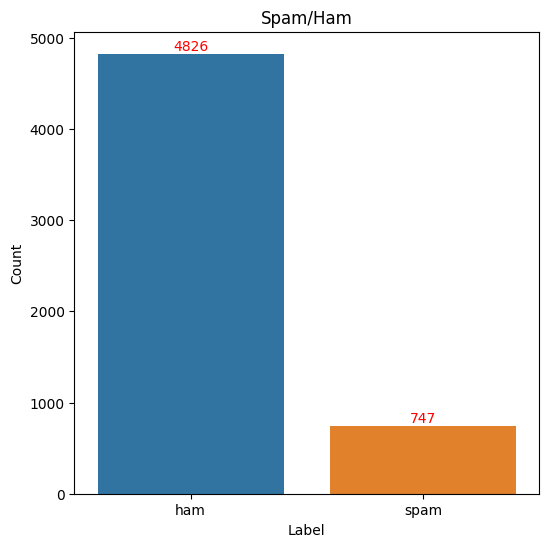

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
print(sampled_data['label'].value_counts(normalize=True))
print('Number of Ham: ',(sampled_data['label'] == 'ham').count())
print('Number of Spam: ', (sampled_data['label'] == 'spam').count())
print('Number of Rows in Dataset: ', sampled_data.shape[0])

# Create the countplot with custom x-axis labels
sns.countplot(x='label', data=data_df)
plt.title('Spam/Ham')

ax = plt.gca()

# Set the x-axis label to "Credit"
ax.set_xlabel("Label")
ax.set_ylabel("Count")

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
            '%d' % int(p.get_height()),
          color='red', ha='center', va='bottom')
plt.show()

In [4]:
sampled_data['message'] = sampled_data.message.str.replace('[^\w\s]', '')
sampled_data['message'] = sampled_data.message.str.lower()
print(sampled_data['message'])

3465    haha figures well i found the piece and prisci...
2895                            went to ganesh dress shop
980     if he started searching he will get job in few...
4252    send ur birthdate with month and year i will t...
1951    haha really oh no how then will they deduct yo...
                              ...                        
1304        your right ill make the appointment right now
1385    thats ok i popped in to ask bout something and...
1466    your account has been refilled successfully by...
3209    havent mus ask if u can 1st wat of meet 4 lunc...
1369                      did you try making another butt
Name: message, Length: 4737, dtype: object


<ipython-input-4-56dbec168c8d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sampled_data['message'] = sampled_data.message.str.replace('[^\w\s]', '')


<ipython-input-5-513d2710ebbe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sampled_data[sampled_data['label']== 'spam']['word_count'],
<ipython-input-5-513d2710ebbe>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sampled_data[sampled_data['label']== 'ham']['word_count'],


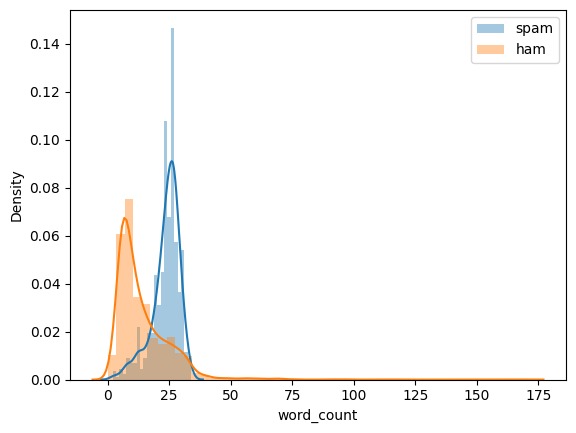

In [5]:
sampled_data['word_count'] = sampled_data.message.str.split().str.len()

sns.distplot(sampled_data[sampled_data['label']== 'spam']['word_count'],
             label='spam')
sns.distplot(sampled_data[sampled_data['label']== 'ham']['word_count'],
             label='ham')

plt.legend()
plt.show()

In [6]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

first_10_messages = sampled_data['message'][:10]

# Combine into a "text" variable with '\n' at the end of each message
text = '\n'.join(first_10_messages)

tokenized_sent = sent_tokenize(text)

print(tokenized_sent)

['haha figures well i found the piece and priscillas bowl\nwent to ganesh dress shop\nif he started searching he will get job in few dayshe have great potential and talent\nsend ur birthdate with month and year i will tel u ur life partners name and the method of calculation reply must\nhaha really oh no how then will they deduct your lesson tmr\nhow come u got nothing to do\nthe lay man just to let you know you are missed and thought off do have a great day and if you can send me bimbo and ugos numbers ill appreciate safe\nok lor\nas if i wasnt having enough trouble sleeping\nok thats cool its  just off either raglan rd or edward rd behind the cricket ground gimme ring when ur closeby see you tuesday']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk.tokenize import word_tokenize

first_10_messages = sampled_data['message'][:10]

# Combine into a "text" variable with '\n' at the end of each message
text = '\n'.join(first_10_messages)

tokenized_word = word_tokenize(text)

print(tokenized_word)

['haha', 'figures', 'well', 'i', 'found', 'the', 'piece', 'and', 'priscillas', 'bowl', 'went', 'to', 'ganesh', 'dress', 'shop', 'if', 'he', 'started', 'searching', 'he', 'will', 'get', 'job', 'in', 'few', 'dayshe', 'have', 'great', 'potential', 'and', 'talent', 'send', 'ur', 'birthdate', 'with', 'month', 'and', 'year', 'i', 'will', 'tel', 'u', 'ur', 'life', 'partners', 'name', 'and', 'the', 'method', 'of', 'calculation', 'reply', 'must', 'haha', 'really', 'oh', 'no', 'how', 'then', 'will', 'they', 'deduct', 'your', 'lesson', 'tmr', 'how', 'come', 'u', 'got', 'nothing', 'to', 'do', 'the', 'lay', 'man', 'just', 'to', 'let', 'you', 'know', 'you', 'are', 'missed', 'and', 'thought', 'off', 'do', 'have', 'a', 'great', 'day', 'and', 'if', 'you', 'can', 'send', 'me', 'bimbo', 'and', 'ugos', 'numbers', 'ill', 'appreciate', 'safe', 'ok', 'lor', 'as', 'if', 'i', 'wasnt', 'having', 'enough', 'trouble', 'sleeping', 'ok', 'thats', 'cool', 'its', 'just', 'off', 'either', 'raglan', 'rd', 'or', 'edward

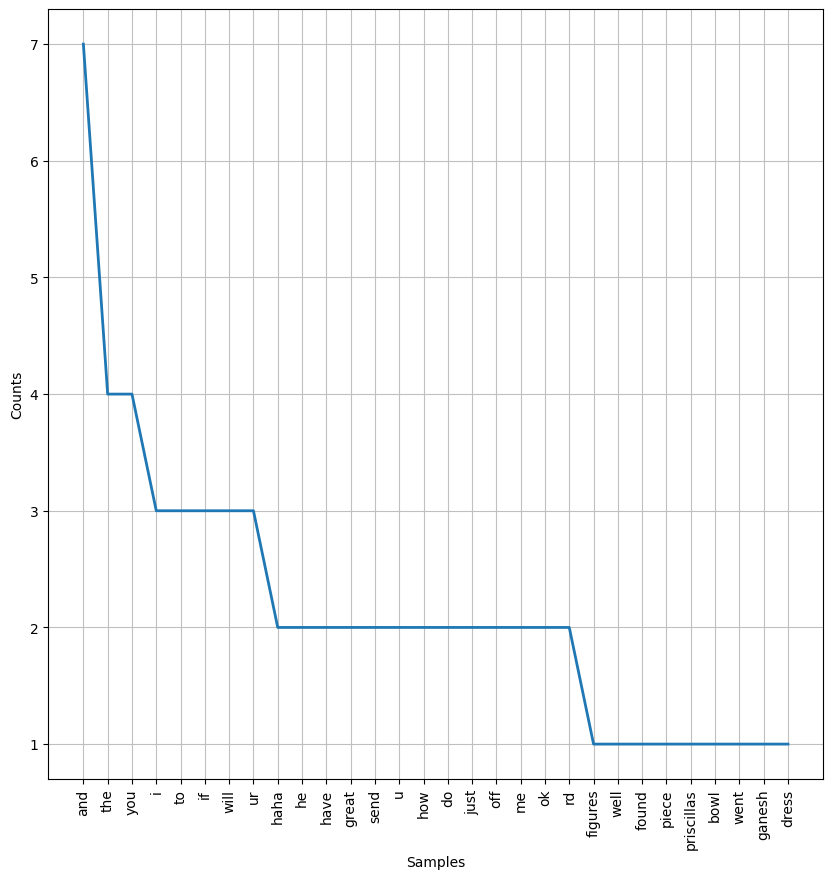

In [8]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word)

plt.figure(figsize=(10,10))
fdist.plot(30, cumulative=False)
plt.show()

In [9]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
new_stopwords = ["haha", "u", "ur", "ok", "rd"]

new_stopwords_list = stop_words.union(new_stopwords)

filtered_sent = []

for w in tokenized_word:
  if w not in new_stopwords_list:
    filtered_sent.append(w)

print("Tokenized Sentence: ", tokenized_sent)
print("FIltered Sentence: ", filtered_sent)

Tokenized Sentence:  ['haha figures well i found the piece and priscillas bowl\nwent to ganesh dress shop\nif he started searching he will get job in few dayshe have great potential and talent\nsend ur birthdate with month and year i will tel u ur life partners name and the method of calculation reply must\nhaha really oh no how then will they deduct your lesson tmr\nhow come u got nothing to do\nthe lay man just to let you know you are missed and thought off do have a great day and if you can send me bimbo and ugos numbers ill appreciate safe\nok lor\nas if i wasnt having enough trouble sleeping\nok thats cool its  just off either raglan rd or edward rd behind the cricket ground gimme ring when ur closeby see you tuesday']
FIltered Sentence:  ['figures', 'well', 'found', 'piece', 'priscillas', 'bowl', 'went', 'ganesh', 'dress', 'shop', 'started', 'searching', 'get', 'job', 'dayshe', 'great', 'potential', 'talent', 'send', 'birthdate', 'month', 'year', 'tel', 'life', 'partners', 'name'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


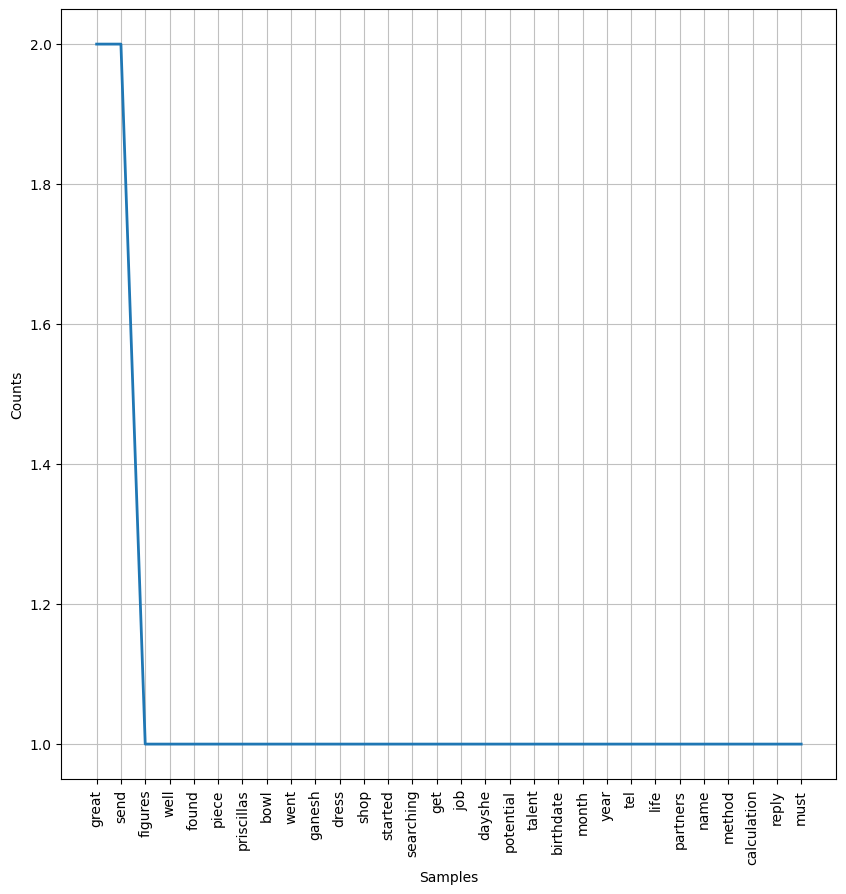

In [10]:
from nltk.probability import FreqDist

fdist = FreqDist(filtered_sent)

plt.figure(figsize=(10,10))
fdist.plot(30, cumulative=False)
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

sampled_data['label'] = np.where(sampled_data['label'] == 'spam', 1, 0)

token = RegexpTokenizer(r'[a-zA-Z0-9]+')


cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range= (1,1),
                     tokenizer = token.tokenize)

text_count = cv.fit_transform(sampled_data['message'])
print(text_count)

  (0, 3581)	1
  (0, 3083)	1
  (0, 5725)	1
  (0, 5953)	1
  (0, 1606)	1
  (1, 8168)	1
  (1, 3325)	1
  (1, 2697)	1
  (1, 6692)	1
  (2, 7061)	1
  (2, 6545)	1
  (2, 4188)	1
  (2, 2400)	1
  (2, 3508)	1
  (2, 5865)	1
  (2, 7328)	1
  (3, 6586)	1
  (3, 7876)	2
  (3, 1511)	1
  (3, 5026)	1
  (3, 8450)	1
  (3, 7392)	1
  (3, 7775)	1
  (3, 4508)	1
  (3, 5605)	1
  :	:
  (4734, 1351)	1
  (4734, 4368)	1
  (4735, 7775)	3
  (4735, 4619)	1
  (4735, 4849)	2
  (4735, 552)	1
  (4735, 2345)	1
  (4735, 1221)	2
  (4735, 3642)	1
  (4735, 379)	2
  (4735, 4688)	1
  (4735, 5130)	1
  (4735, 388)	1
  (4735, 8095)	1
  (4735, 2156)	1
  (4735, 8071)	1
  (4735, 1212)	1
  (4735, 8030)	1
  (4735, 3354)	1
  (4735, 2473)	1
  (4735, 5112)	1
  (4736, 2534)	1
  (4736, 7723)	1
  (4736, 4755)	1
  (4736, 1733)	1


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
print(cv.vocabulary_)

{'haha': 3581, 'figures': 3083, 'piece': 5725, 'priscillas': 5953, 'bowl': 1606, 'went': 8168, 'ganesh': 3325, 'dress': 2697, 'shop': 6692, 'started': 7061, 'searching': 6545, 'job': 4188, 'dayshe': 2400, 'great': 3508, 'potential': 5865, 'talent': 7328, 'send': 6586, 'ur': 7876, 'birthdate': 1511, 'month': 5026, 'year': 8450, 'tel': 7392, 'u': 7775, 'life': 4508, 'partners': 5605, 'method': 4904, 'calculation': 1758, 'reply': 6269, 'really': 6159, 'oh': 5408, 'deduct': 2442, 'lesson': 4488, 'tmr': 7577, 'come': 2099, 'got': 3471, 'lay': 4445, 'man': 4761, 'just': 4236, 'let': 4490, 'know': 4348, 'missed': 4954, 'thought': 7511, 'day': 2395, 'bimbo': 1502, 'ugos': 7785, 'numbers': 5346, 'ill': 3945, 'appreciate': 1154, 'safe': 6443, 'ok': 5414, 'lor': 4619, 'wasnt': 8091, 'having': 3645, 'trouble': 7709, 'sleeping': 6805, 'thats': 7459, 'cool': 2203, 'raglan': 6094, 'rd': 6137, 'edward': 2785, 'cricket': 2278, 'ground': 3527, 'gimme': 3394, 'ring': 6345, 'closeby': 2044, 'tuesday': 773

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_count,
                                                    sampled_data['label'],
                                                    test_size = .3,
                                                    random_state = 5)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print('MultinomialNB Accuracy: ', metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy:  0.9725738396624473


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english')

text_tf = tf.fit_transform(sampled_data['message'])
print(text_tf)

  (0, 1566)	0.4400481878173749
  (0, 5924)	0.4913870651884185
  (0, 5696)	0.4913870651884185
  (0, 3051)	0.4686692500460289
  (0, 3548)	0.3221556002787519
  (1, 6662)	0.44517465568994535
  (1, 2666)	0.5712252628041783
  (1, 3293)	0.5712252628041783
  (1, 8137)	0.3862938314287889
  (2, 7298)	0.42302743944619026
  (2, 5836)	0.42302743944619026
  (2, 3476)	0.2617362595034886
  (2, 2367)	0.43809445257424384
  (2, 4162)	0.3065153746861856
  (2, 6515)	0.4113405561154425
  (2, 7031)	0.34425313943611524
  (3, 6239)	0.20339737325416682
  (3, 1720)	0.357893778293593
  (3, 4877)	0.37524197149185956
  (3, 5576)	0.37524197149185956
  (3, 4481)	0.23191328021961374
  (3, 7361)	0.2985799139796263
  (3, 8421)	0.24926147341788038
  (3, 4999)	0.2623275048708407
  (3, 1470)	0.357893778293593
  :	:
  (4734, 7167)	0.26051213545250157
  (4734, 3891)	0.19446733980896583
  (4734, 860)	0.3978462806938586
  (4734, 4642)	0.4172049911999672
  (4734, 6372)	0.23815587042998967
  (4734, 4646)	0.13737841878664908
  (4

In [16]:
print(tf.vocabulary_)

{'haha': 3548, 'figures': 3051, 'piece': 5696, 'priscillas': 5924, 'bowl': 1566, 'went': 8137, 'ganesh': 3293, 'dress': 2666, 'shop': 6662, 'started': 7031, 'searching': 6515, 'job': 4162, 'dayshe': 2367, 'great': 3476, 'potential': 5836, 'talent': 7298, 'send': 6556, 'ur': 7846, 'birthdate': 1470, 'month': 4999, 'year': 8421, 'tel': 7361, 'life': 4481, 'partners': 5576, 'method': 4877, 'calculation': 1720, 'reply': 6239, 'really': 6129, 'oh': 5380, 'deduct': 2410, 'lesson': 4461, 'tmr': 7548, 'come': 2065, 'got': 3439, 'lay': 4419, 'man': 4733, 'just': 4211, 'let': 4463, 'know': 4322, 'missed': 4927, 'thought': 7482, 'day': 2362, 'bimbo': 1461, 'ugos': 7754, 'numbers': 5317, 'ill': 3915, 'appreciate': 1112, 'safe': 6413, 'ok': 5386, 'lor': 4591, 'wasnt': 8059, 'having': 3613, 'trouble': 7680, 'sleeping': 6775, 'thats': 7428, 'cool': 2169, 'raglan': 6064, 'rd': 6107, 'edward': 2753, 'cricket': 2246, 'ground': 3495, 'gimme': 3362, 'ring': 6315, 'closeby': 2010, 'tuesday': 7708, 'heard':

In [17]:
X_train, X_test, y_train, y_test = train_test_split(text_tf,
                                                    sampled_data['label'],
                                                    test_size = .3,
                                                    random_state = 5)

In [18]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print('MultinomialNB Accuracy: ', metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy:  0.9514767932489452


In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)

km.fit(text_tf)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [20]:
from sklearn.decomposition import PCA

clusters = km.predict(text_tf)

pca = PCA(n_components = 2)

two_dim = pca.fit_transform(np.asarray(text_tf.todense()))

scatter_x = two_dim[:, 0]
scatter_y = two_dim[:,1]

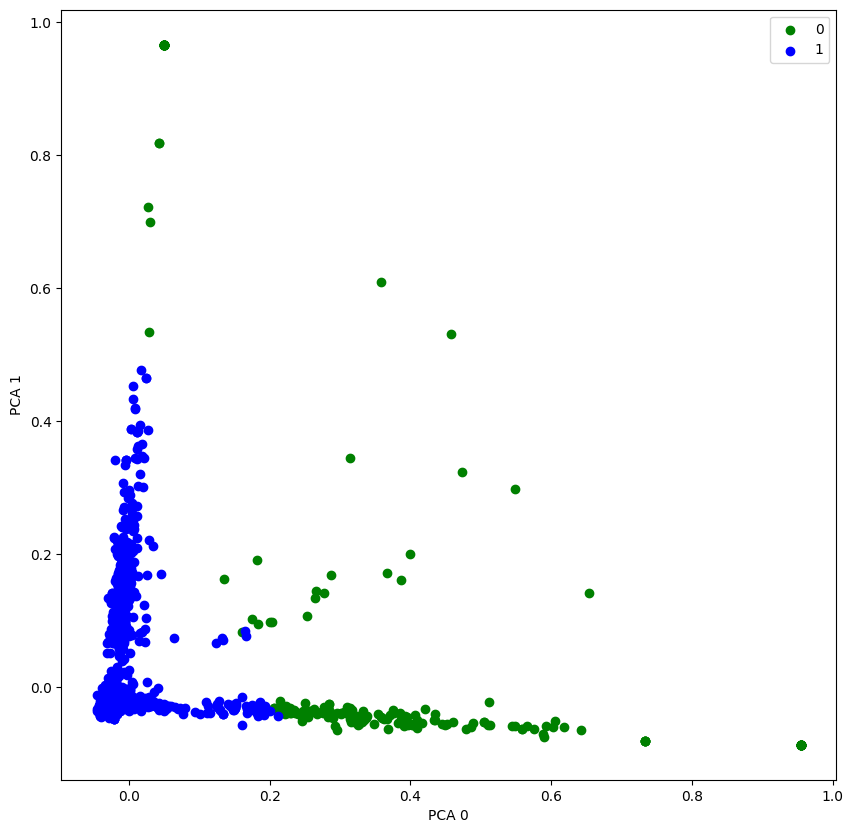

In [21]:
fig, ax = plt. subplots()
fig.set_size_inches(10,10)

cmap = {0: 'green', 1: 'blue'}

for group in np.unique(clusters):
  ix = np.where(clusters == group)
  ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()

plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()


In [22]:
order_centroids = km.cluster_centers_.argsort()

terms = tf.get_feature_names_out()

for i in range(2):
  print("Cluster %d: " %i, end="")
  for ind in order_centroids[i, :10]:
    print(" %s " %terms[ind], end='')
  print()

Cluster 0:  008704050406  petey  peteis  pete  pest  pesky  perumbavoor  perspective  persons  personmeet 
Cluster 1:  castor  mushy  hectic  â6  therexx  themp  burden  taxt  ktv  ksry 


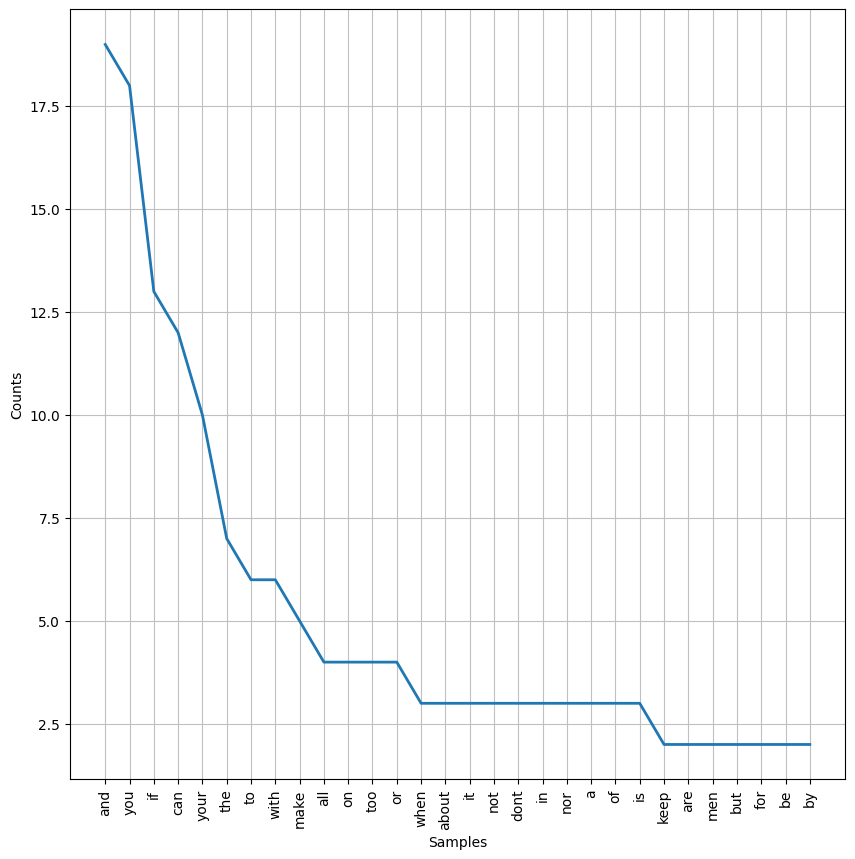

In [23]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

if_kipling = '''If you can keep your head when all about you
    Are losing theirs and blaming it on you,
If you can trust yourself when all men doubt you,
    But make allowance for their doubting too;
If you can wait and not be tired by waiting,
    Or being lied about, don’t deal in lies,
Or being hated, don’t give way to hating,
    And yet don’t look too good, nor talk too wise:

If you can dream—and not make dreams your master;
    If you can think and not make thoughts your aim;
If you can meet with Triumph and Disaster
    And treat those two impostors just the same;
If you can bear to hear the truth you’ve spoken
    Twisted by knaves to make a trap for fools,
Or watch the things you gave your life to, broken,
    And stoop and build ’em up with worn-out tools:

If you can make one heap of all your winnings
    And risk it on one turn of pitch and toss,
And lose, and start again at your beginnings
    And never breathe a word about your loss;
If you can force your heart and nerve and sinew
    To serve your turn long after they are gone,
And so hold on when there is nothing in you
    Except the Will which says to them: ‘Hold on!’

If you can talk with crowds and keep your virtue,
    Or walk with Kings nor lose the common touch,
If neither foes nor loving friends can hurt you,
    If all men count with you, but none too much;
If you can fill the unforgiving minute
    With sixty seconds’ worth of distance run,
Yours is the Earth and everything that’s in it,
    And which is more you’ll be a Man, my son!'''

# Remove non-alphanumeric characters and convert to lowercase
if_kipling_filt = re.sub(r'[^a-zA-Z0-9\s]', '', if_kipling).lower()

tokenized_word = word_tokenize(if_kipling_filt)

fdist = FreqDist(tokenized_word)

plt.figure(figsize=(10,10))
fdist.plot(30, cumulative=False)
plt.show()


In [24]:
stop_words = set(stopwords.words("english"))
new_stopwords = ["and", "you", "if", "can", "your", "the", "to", "with"]

new_stopwords_list = stop_words.union(new_stopwords)

filtered_sent = []

for w in tokenized_word:
  if w not in new_stopwords_list:
    filtered_sent.append(w)
print("FIltered Sentence: ", filtered_sent)

FIltered Sentence:  ['keep', 'head', 'losing', 'blaming', 'trust', 'men', 'doubt', 'make', 'allowance', 'doubting', 'wait', 'tired', 'waiting', 'lied', 'dont', 'deal', 'lies', 'hated', 'dont', 'give', 'way', 'hating', 'yet', 'dont', 'look', 'good', 'talk', 'wise', 'dreamand', 'make', 'dreams', 'master', 'think', 'make', 'thoughts', 'aim', 'meet', 'triumph', 'disaster', 'treat', 'two', 'impostors', 'bear', 'hear', 'truth', 'youve', 'spoken', 'twisted', 'knaves', 'make', 'trap', 'fools', 'watch', 'things', 'gave', 'life', 'broken', 'stoop', 'build', 'em', 'wornout', 'tools', 'make', 'one', 'heap', 'winnings', 'risk', 'one', 'turn', 'pitch', 'toss', 'lose', 'start', 'beginnings', 'never', 'breathe', 'word', 'loss', 'force', 'heart', 'nerve', 'sinew', 'serve', 'turn', 'long', 'gone', 'hold', 'nothing', 'except', 'says', 'hold', 'talk', 'crowds', 'keep', 'virtue', 'walk', 'kings', 'lose', 'common', 'touch', 'neither', 'foes', 'loving', 'friends', 'hurt', 'men', 'count', 'none', 'much', 'fil

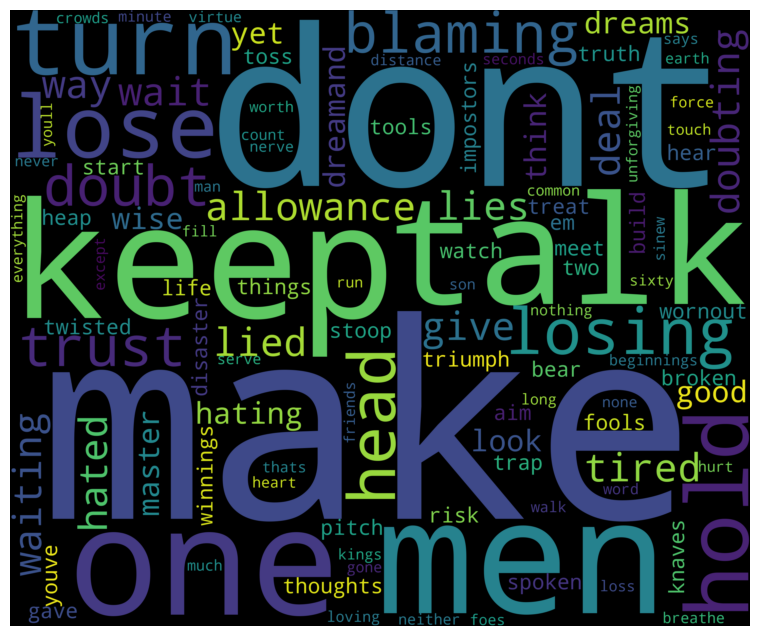

In [25]:
# Generate word cloud
wordcloud = WordCloud(
    background_color='black',
    width=3000,
    height=2500
).generate(' '.join(filtered_sent))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


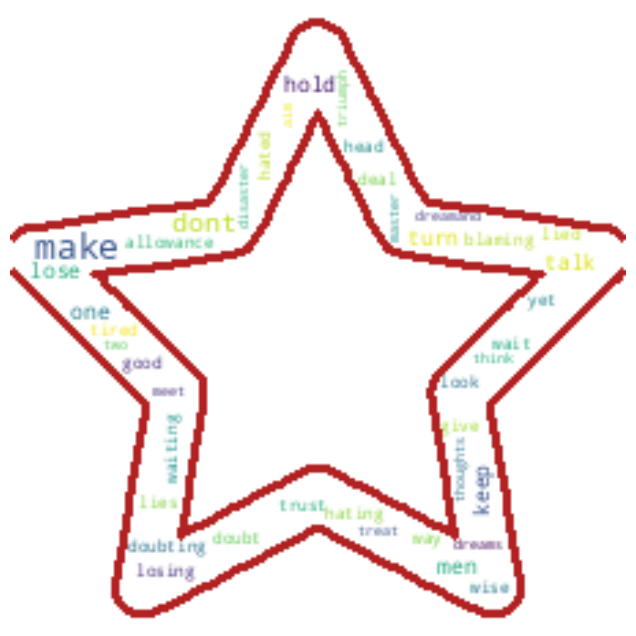

In [26]:
from PIL import Image, ImageOps, ImageDraw

star_mask = np.array(Image.open("star_outline.png"))

def transform_format(val):
  if val == 0:
    return 255
  else:
    return val

transformed_star_mask = np.ndarray((star_mask.shape[0], star_mask.shape[1]),
                                  np.int32)

for i in range(len(star_mask)):
  transformed_star_mask[i] = list(map(transform_format, star_mask[i]))

# Generate the WordCloud using the modified alpha mask
wc = WordCloud(
    background_color="white",  # Use a transparent background
    mask=transformed_star_mask,
    contour_width=2,
    contour_color="firebrick",
).generate(' '.join(filtered_sent))

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
